Value-Iteration Algorithm:
In every iteration, update the value function until it is the one very close to the actual one.
Then choose the optimal action for every state.  
The difference between value-iteration and policy-iteration: value: first iterate value function until converge, then choose the optimal action. policy: first choose the policy, then get its value function, then get the optimal action for the current value function, if the optimal action is consistent with the policy, it converges; otherwise update the policy using the optimal action.

In [1]:
import numpy as np
import gym
def Get_Value_Function(env, gamma, num_iterations, threshold):
    values = np.zeros(env.observation_space.n)
    for i in range(num_iterations):
        old_values = np.copy(values)
        for s in range(env.observation_space.n):
            Q = np.zeros(env.action_space.n)
            for a in range(env.action_space.n):
                for prob, nextState, r , _ in env.P[s][a]:
                    Q[a] += prob * (r + gamma * old_values[nextState])
            values[s] = np.max(Q)
        if np.sum(np.fabs(old_values - values)) <= threshold:
            return values
    return values

def Get_Policy(env, gamma, value_function):
    policy = np.zeros(env.observation_space.n)
    for s in range(env.observation_space.n):
        Q = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for prob, nextState, r, _ in env.P[s][a]:
                Q[a] += prob * (r + gamma * value_function[nextState])
        policy[s] = np.argmax(Q)
    return policy

def Value_Iteration(env, gamma, num_iterations, threshold):
    optimal_value = Get_Value_Function(env, gamma, num_iterations, threshold)
    optimal_policy = Get_Policy(env, gamma, optimal_value)
    return optimal_policy

In [2]:
env = gym.make("FrozenLake-v1")
env.reset()
gamma = 1
num_iterations = 100000
threshold = 1e-30
optimal_policy = Value_Iteration(env, gamma, num_iterations, threshold)
print(optimal_policy)

e:\python\Lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
e:\python\Lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


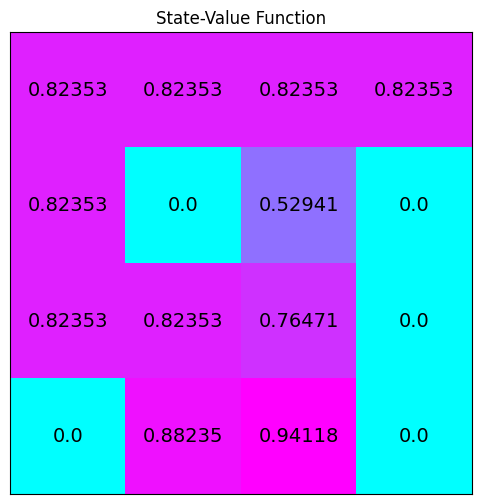

In [3]:
#visualization: the policy is not intuitive. The values for each state is intuitive: you can always choose the state with higher reward given the value function

import matplotlib.pyplot as plt
def Policy_Evaluation(env, gamma, policy, threshold):
    #initialize values for all states
    values = np.zeros(env.observation_space.n)
    #initialize the difference(true value function - estimated value function) with a large number 
    difference = 9999999
    while(difference > threshold):
        old_values = np.copy(values)
        for s in range(env.observation_space.n):
            a = policy[s]
            value = 0
            for prob, nextState, r, _ in env.P[s][a]:
                value += prob * (r + gamma * old_values[nextState])
            values[s] = value
        difference = np.sum(np.fabs(old_values - values))
    return values

def Value_Function_Visualization(value_function):
    square = np.reshape(value_function,(4,4))
    figure = plt.figure(figsize=(6,6))
    ax = figure.add_subplot(111)
    im = ax.imshow(square, cmap='cool')
    for (j,i), label in np.ndenumerate(square):
        ax.text(i,j, np.round(label,5), ha='center', va='center', fontsize=14)
    plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.title('State-Value Function')
    plt.show()

optimal_value_function = Policy_Evaluation(env, gamma, optimal_policy, threshold)
Value_Function_Visualization(optimal_value_function)